In [1]:
%matplotlib notebook

import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Long Version: 27 s
Simple Version: 27 s

In [4]:
variables = ['nTrackJetsOR', 'MV1cB1_cont', 'MV1cB2_cont', 'mBB', 'dRBB', 'pTB1',
             'pTB2', 'MET', 'dPhiVBB','dPhiLBmin', 'Mtop', 'dYWH', 'mTW', 'pTV']


dfSimple = pd.read_csv("Datasets/Plotcsv2.csv")
dfComplex = pd.read_csv("Datasets/ComplexPlotcsv2.csv")

#dfSimple = dfSimple.sort_values('EventNumber')
#dfComplex = dfComplex.sort_values('EventNumber')

#dfSimple.reset_index(drop=True, inplace=True)
#dfComplex.reset_index(drop=True, inplace=True)

#dfsortedBDT = dfSimple.sort_values('decision_value')
#dfsortedNN = dfComplex.sort_values('decision_value')



In [16]:
def BDTdist(var,xrange,yrange):

    mva_type = ["Simple", "Complex","dataset"]
    
    BDT_simple = []
    BDT_complex = []
    raw_data = []
    
    for mva in mva_type:
        
        if mva == "Simple":
            df_low = dfSimple.loc[dfSimple['decision_value'] <= 0.8]
            df_high = dfSimple.loc[dfSimple['decision_value'] > 0.8]
            
        elif mva == "Complex":
            df_low = dfComplex.loc[dfComplex['decision_value'] <= 0.8]
            df_high = dfComplex.loc[dfComplex['decision_value'] > 0.8]
        
            
            
    
        num_bin = 150
        bin_lims = np.linspace(xrange,yrange,num_bin+1)
        bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
        bin_widths = bin_lims[1:]-bin_lims[:-1]

        if mva == "dataset":
            signal = (dfSimple.loc[dfSimple['Class'] == 1])[str(var)]
            background = (dfSimple.loc[dfSimple['Class'] == 0])[str(var)]
            
            hist1, _ = np.histogram(signal, bins = bin_lims)
            hist2, _ = np.histogram(background, bins = bin_lims)
            
            hist_s = hist1/np.max(hist1)
            hist_b = hist2/np.max(hist2)
            
        
        
        else:
            signal_high = (df_high.loc[df_high['Class'] == 1])[str(var)]
            hist1, _ = np.histogram(signal_high, bins=bin_lims)

            signal_low = (df_low.loc[df_low['Class'] == 1])[str(var)] 
            hist2, _ = np.histogram(signal_low, bins=bin_lims)
    
            background_high = (df_high.loc[df_high['Class'] == 0])[str(var)]
            hist3, _ = np.histogram(background_high, bins= bin_lims)
    
            background_low = (df_low.loc[df_low['Class'] == 0])[str(var)]
            hist4, _ = np.histogram(background_low, bins= bin_lims)


            ##normalizing
            hist_s_high = hist1/np.max(hist1)
            hist_s_low = hist2/np.max(hist2)
            hist_b_high = hist3/np.max(hist3)
            hist_b_low = hist4/np.max(hist4)

        if mva == "Simple":
            #print("BDT works")
            BDT_simple.append(hist_s_high)
            BDT_simple.append(hist_s_low)
            BDT_simple.append(hist_b_high)
            BDT_simple.append(hist_b_low)
            
        elif mva == "Complex":
            #print("NN works")
            BDT_complex.append(hist_s_high)
            BDT_complex.append(hist_s_low)
            BDT_complex.append(hist_b_high)
            BDT_complex.append(hist_b_low)
            
        else:
            raw_data.append(hist_s)
            raw_data.append(hist_b)
            

    plt.style.use('ggplot')
    #plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ###################################       
    ################################### 
        
    plt.figure(figsize = (10,15))
    
    
    ax1 = plt.subplot(3,1,1)
    plt.bar(bin_centers, raw_data[0], width = bin_widths, align = 'center', alpha = 1,
        label = "Raw Signal Distribution")

    plt.bar(bin_centers, raw_data[1], width = bin_widths, align = 'center', alpha = 0.75,
        label = "Raw Background Distribution")

    plt.legend()
    plt.xlim(xrange,yrange);
    plt.xlabel(str(var))
    plt.ylabel("Normalised Histogram Output")


    

    ##########################################
    
    plt.subplot(3,2,3, sharex = ax1, sharey = ax1)
    plt.bar(bin_centers, BDT_simple[0], width = bin_widths, align = 'center', alpha = 1,
        label = "High BDT output for Signal")

    plt.bar(bin_centers, BDT_simple[2], width = bin_widths, align = 'center', alpha = 0.75,
        label = "High BDT output for Background")

    plt.legend()
    plt.xlim(xrange,yrange);
    plt.xlabel(str(var))
    plt.ylabel("Normalised Histogram Output")


    plt.subplot(3,2,4, sharex = ax1, sharey = ax1)
    plt.bar(bin_centers, BDT_simple[1], width = bin_widths, align = 'center', alpha = 1,
        label = "Low BDT output for Signal")

    plt.bar(bin_centers, BDT_simple[3], width = bin_widths, align = 'center', alpha = 0.75,
        label = "Low BDT output for Background")
    plt.legend()
    plt.xlabel(str(var))
    plt.ylabel("Normalised Histogram Output");
    
    ##########################################
    
    plt.subplot(3,2,5)
    plt.bar(bin_centers, BDT_complex[0], width = bin_widths, align = 'center', alpha = 1,
        label = "High Deep-BDT output for Signal")

    plt.bar(bin_centers, BDT_complex[2], width = bin_widths, align = 'center', alpha = 0.75,
        label = "High Deep-BDT output for Background")

    plt.legend()
    plt.xlim(xrange,yrange);
    plt.xlabel(str(var))
    plt.ylabel("Normalised Histogram Output")


    plt.subplot(3,2,6, sharex = ax1, sharey = ax1)
    plt.bar(bin_centers, BDT_complex[1], width = bin_widths, align = 'center', alpha = 1,
        label = "Low Deep-BDT output for Signal")

    plt.bar(bin_centers, BDT_complex[3], width = bin_widths, align = 'center', alpha = 0.75,
        label = "Low Deep-BDT output for Background")
    plt.legend()
    plt.xlabel(str(var))
    plt.ylabel("Normalised Histogram Output");
    
    
    
    #plt.savefig(str(var) + "_BDT_Distribution.png")

<IPython.core.display.Javascript object>


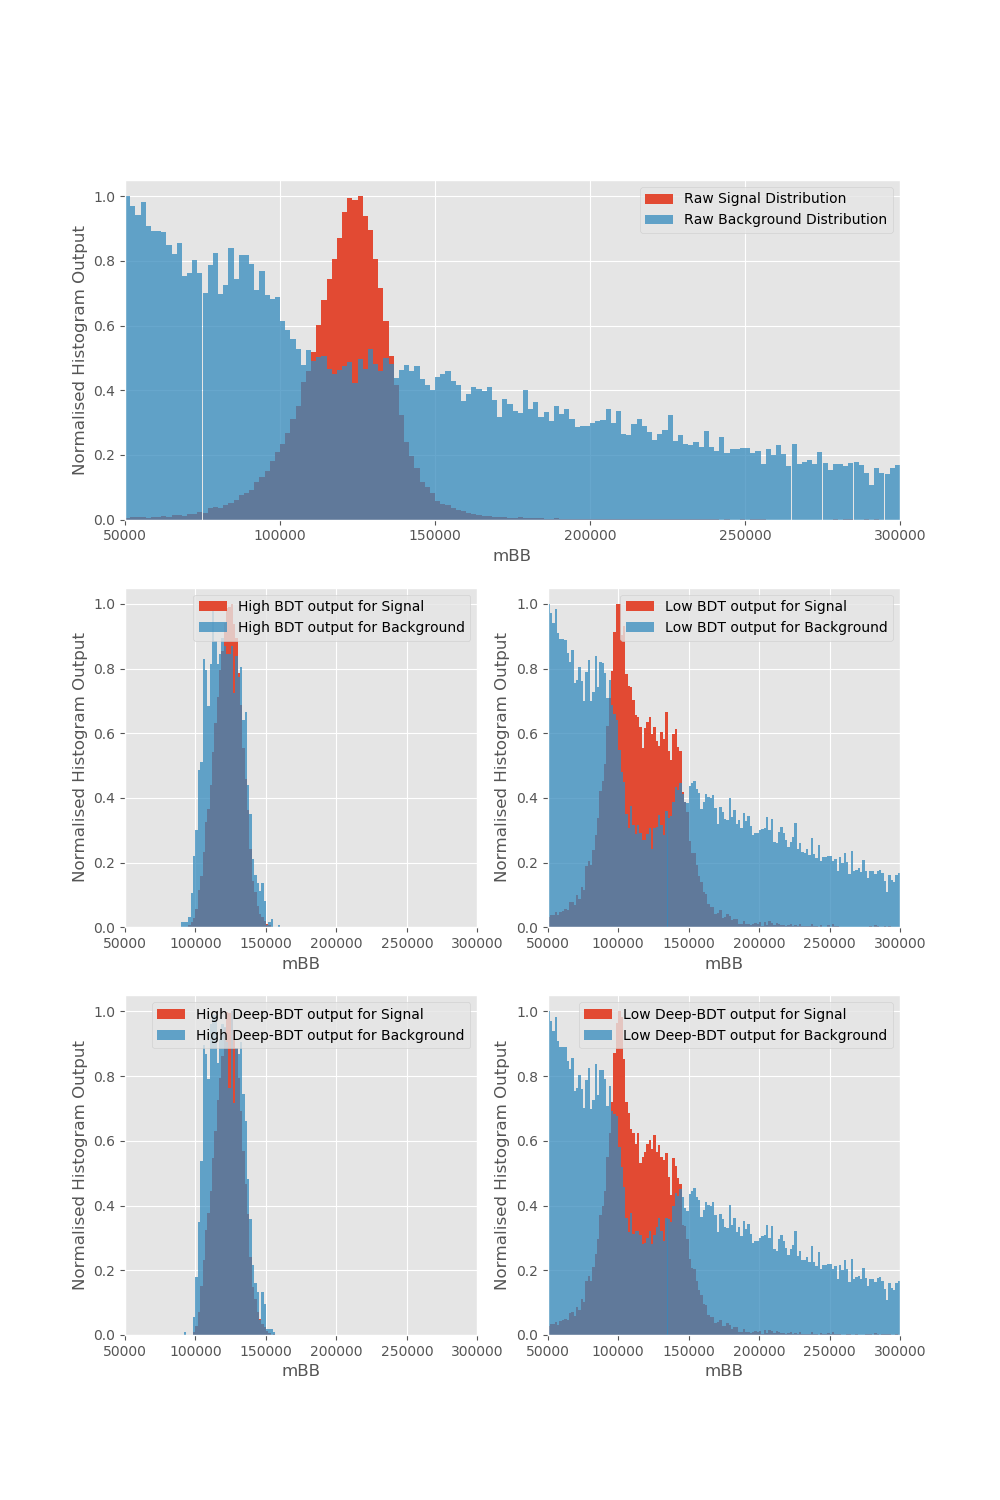

In [17]:
BDTdist("mBB",50000,300000)

<IPython.core.display.Javascript object>


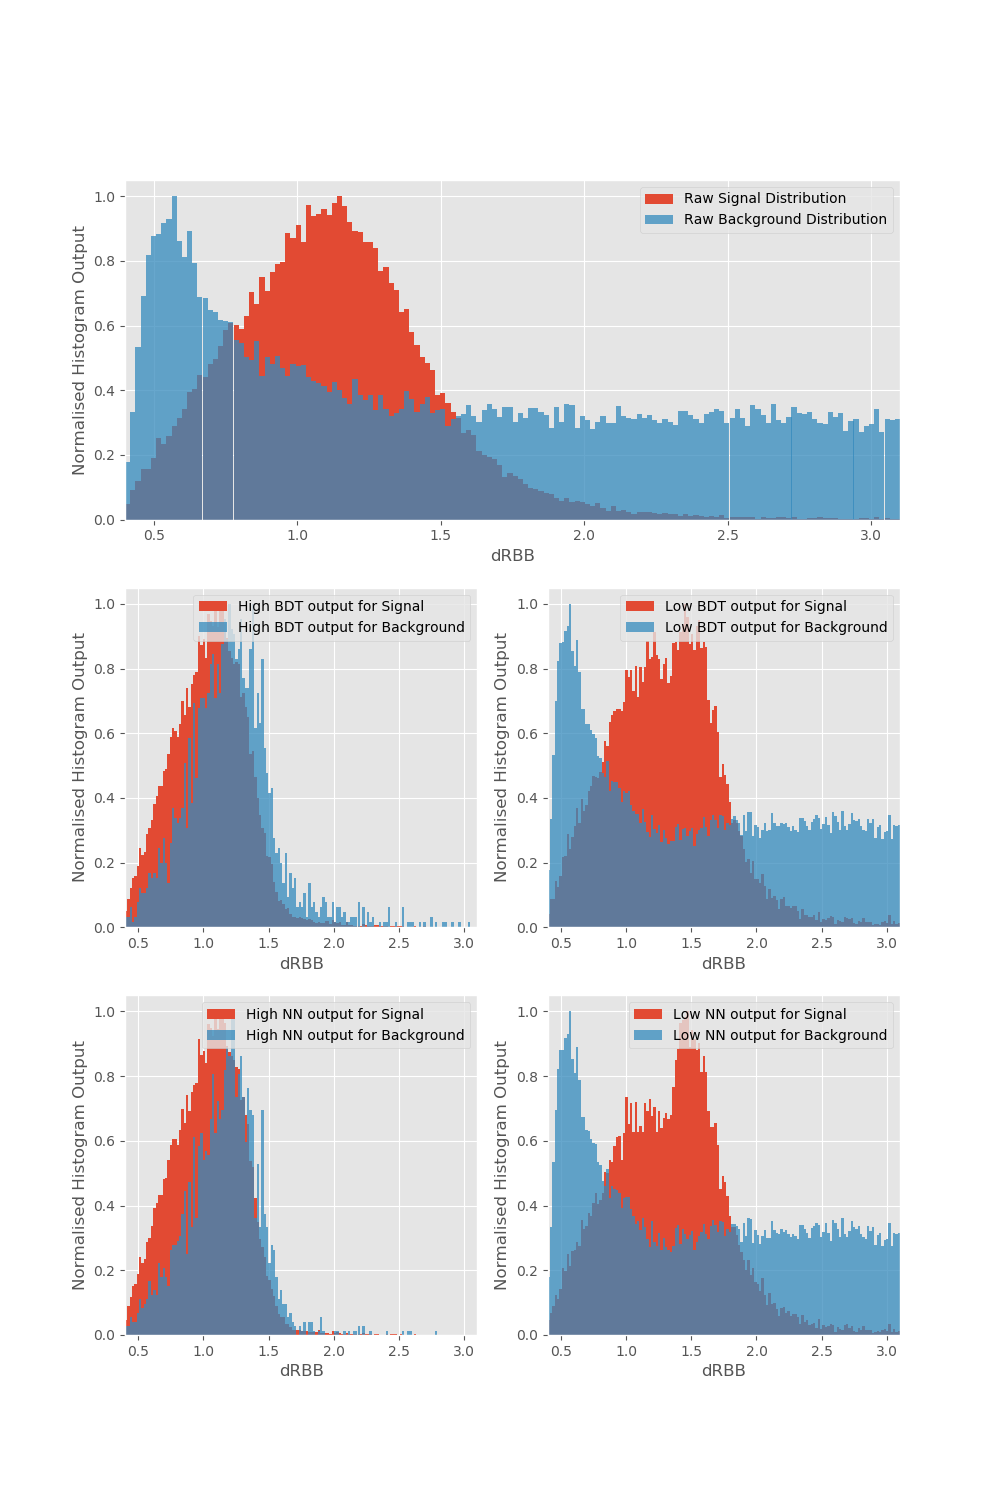

In [15]:
BDTdist("dRBB",0.4,3.1);